# **Summary**
This notebook will work to further clean and preprocess the data to prepare it for statistical testing and machine learning.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# display max columns
pd.set_option('display.max_columns', None)

# import data
df = pd.read_csv("cleaned_HRDataset.csv")
df.shape

(311, 44)

In [2]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,Tenure,DiversityStatus,DeptAverageSalary,Salary_Dept_Ratio,DeptAveragePerfScore,PerformanceStandard,DaysSinceLastReview
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaN,Still Employed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,36,8.490075,Non-Diverse,59967.788462,1.042326,2.980769,1,348
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,Career Change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,44,1.215606,Non-Diverse,97064.640000,1.075953,3.060000,0,113
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,Attendance,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,31,1.223819,Non-Diverse,59967.788462,1.083165,2.980769,1,132
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaN,Still Employed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,31,11.980835,Non-Diverse,59967.788462,1.083765,2.980769,1,362
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,Education,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,30,5.158111,Non-Diverse,59967.788462,0.847538,2.980769,1,218


## **1. Handling Outliers**

In [3]:
cols_winsor = ['EngagementSurvey', 'EmpSatisfaction', 'Absences', 'DaysLateLast30', 'Salary', 'Age']

for col in cols_winsor:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

## **2. Standardize and Normalize**

In [4]:
log_cols = ['SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Salary']
df[log_cols] = df[log_cols].apply(lambda x: np.log1p(x))

In [5]:
cols_standard = ['Salary', 'DeptAverageSalary', 'DeptAveragePerfScore', 'Age', 'Tenure', 'Salary_Dept_Ratio', 'DaysSinceLastReview']
cols_minmax = ['EngagementSurvey', 'EmpSatisfaction', 'PerformanceStandard']

In [6]:
scaler_standard = StandardScaler()
df[cols_standard] = scaler_standard.fit_transform(df[cols_standard])

scaler_minmax = MinMaxScaler()
df[cols_minmax] = scaler_minmax.fit_transform(df[cols_minmax])

In [7]:
df.to_csv('stat_HRDataset.csv', index=False)
print('dataset has been saved')

dataset has been saved


## **3. Visualizations**

In [8]:
df.drop(columns=['Employee_Name', 'EmpID', 'ManagerName', 'ManagerID', 'State', 'Position', 'Zip', 'Salary_Dept_Ratio',
                 'PerformanceStandard', 'DeptAverageSalary', 'DeptAveragePerfScore', 'DOB', 'FromDiversityJobFairID',
                 'Sex', 'DateofHire', 'DateofTermination', 'TermReason', 'LastPerformanceReview_Date', 'EmploymentStatus',
                 'DiversityStatus', 'CitizenDesc', 'RaceDesc', 'HispanicLatino', 'Department', 'RecruitmentSource',
                 'PerformanceScore', 'EmpStatusID', 'MaritalDesc'], inplace=True)
df.shape

(311, 16)

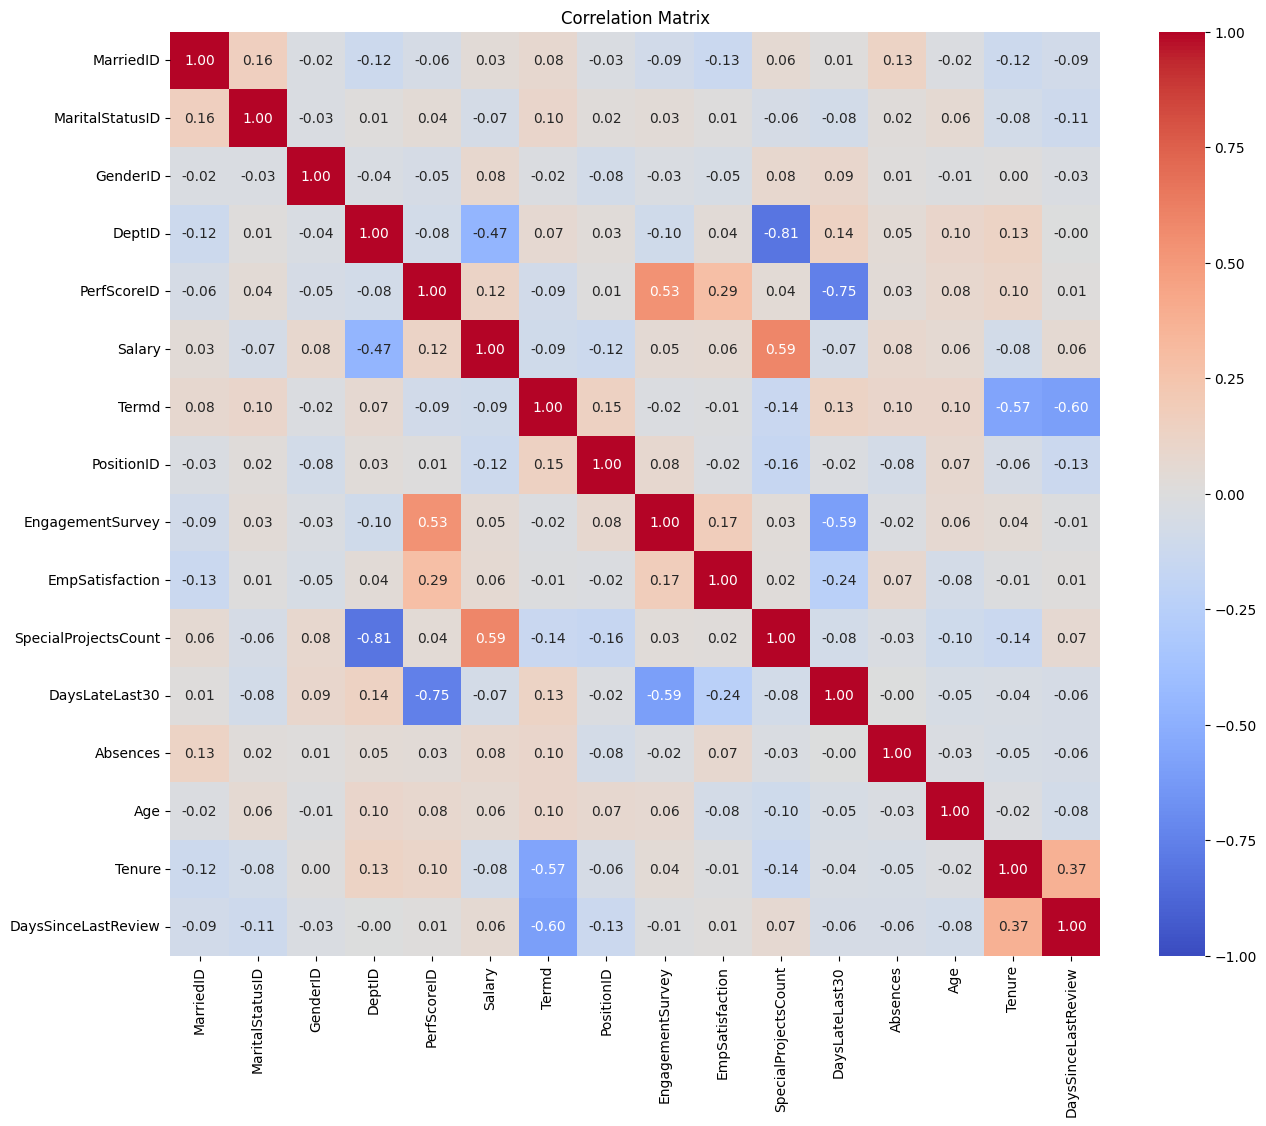

In [9]:
# correlation matrix

correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [10]:
df.to_csv('model_HRDataset.csv', index=False)
print('dataset has been saved')

dataset has been saved


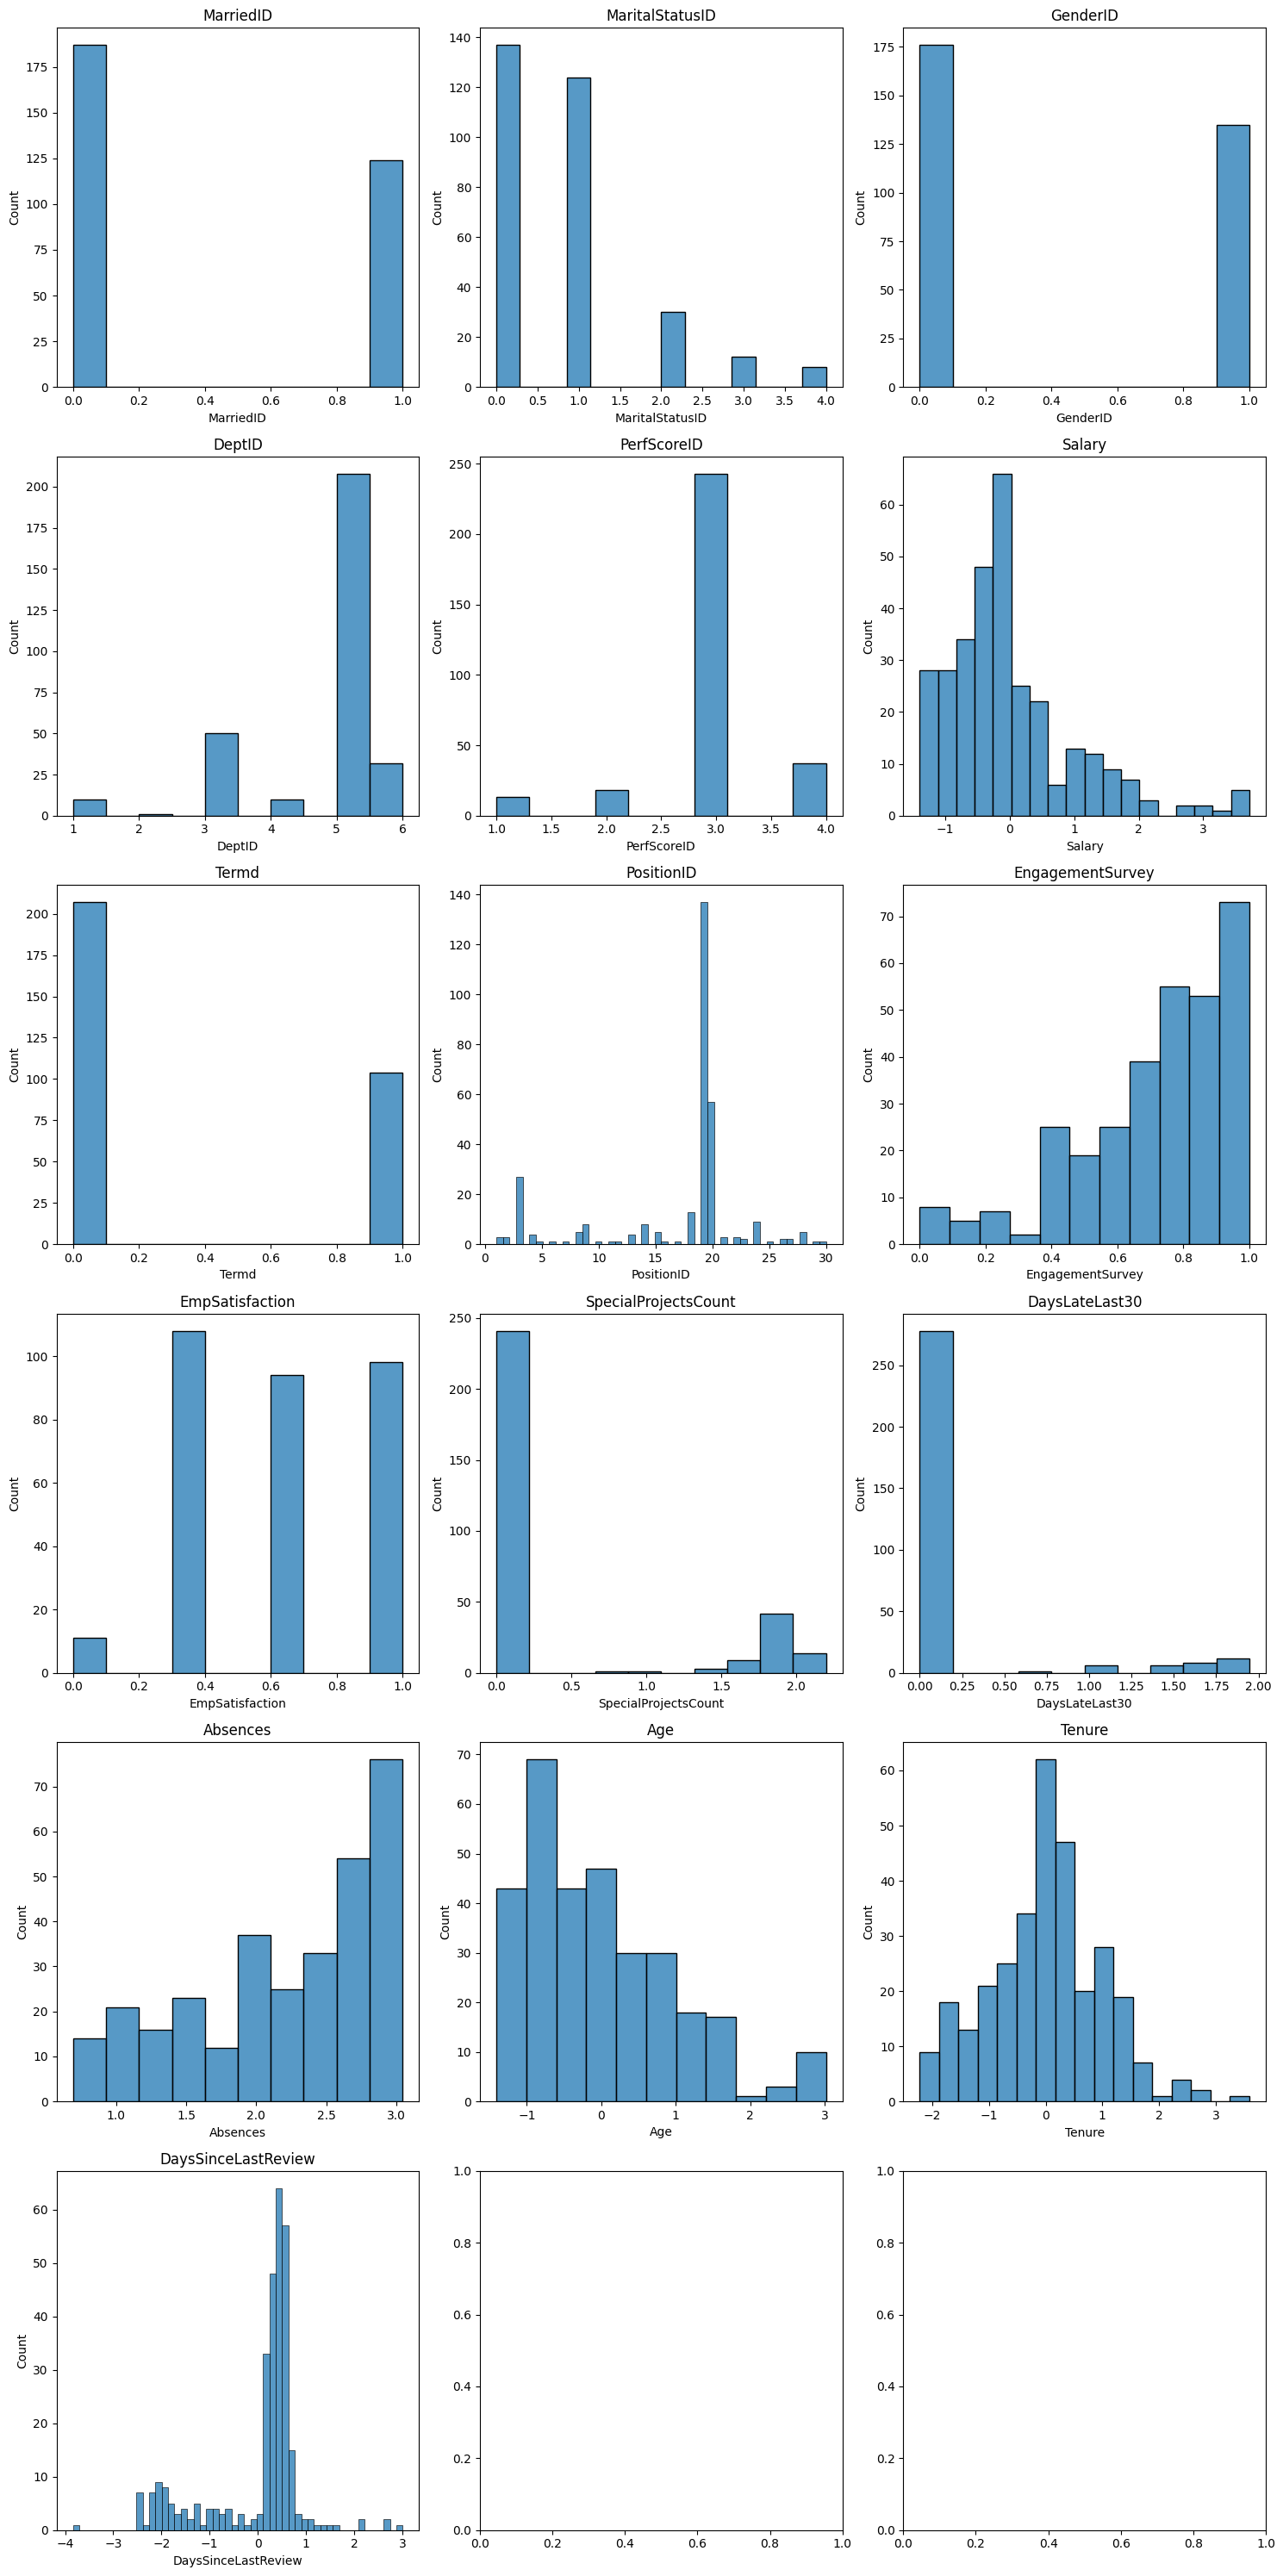

In [11]:
def visualize_distributions(df, num_cols=3, figsize=(15, 5)):
    num_rows = int(np.ceil(len(df.columns) / num_cols))
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if df[col].dtype == 'object':
            sns.countplot(x=col, data=df, ax=ax)
        else:
            sns.histplot(x=col, data=df, ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

visualize_distributions(df)

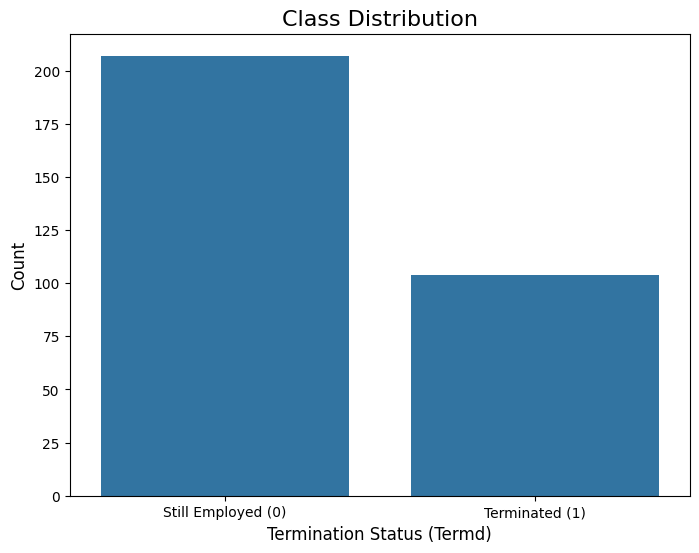

In [12]:
# class distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='Termd', data=df)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Termination Status (Termd)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Still Employed (0)', 'Terminated (1)'], rotation=0)
plt.show()

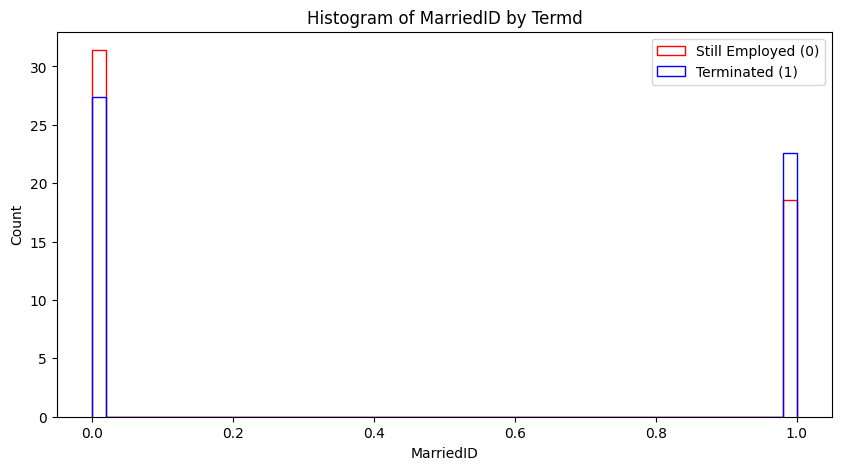

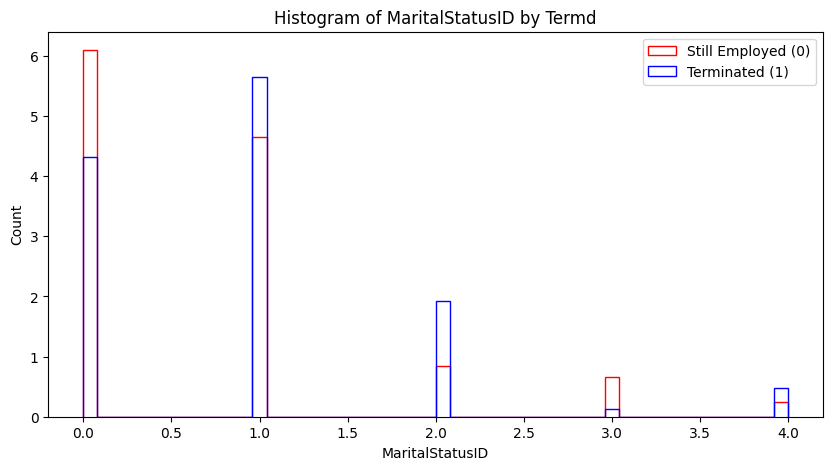

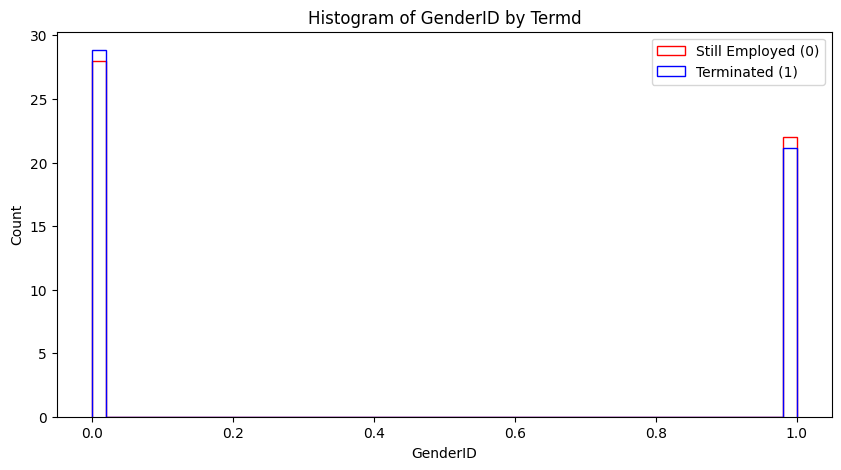

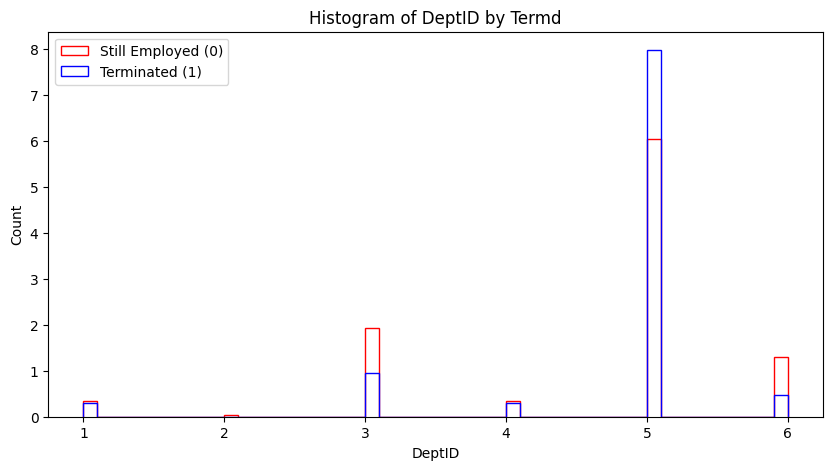

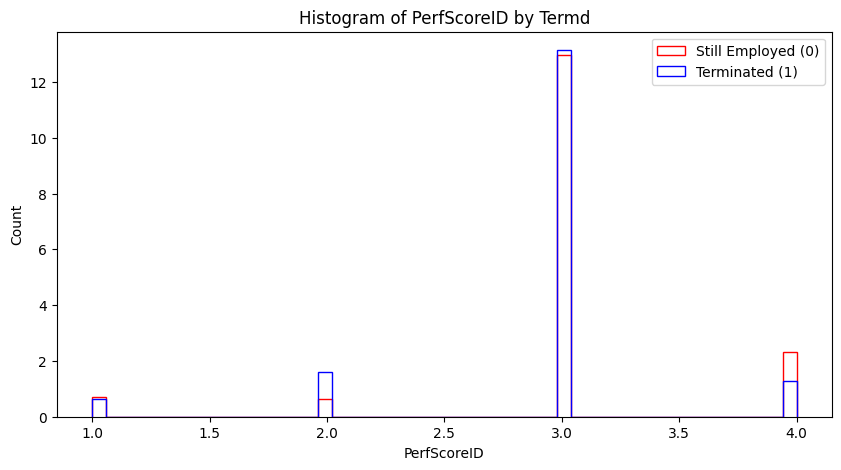

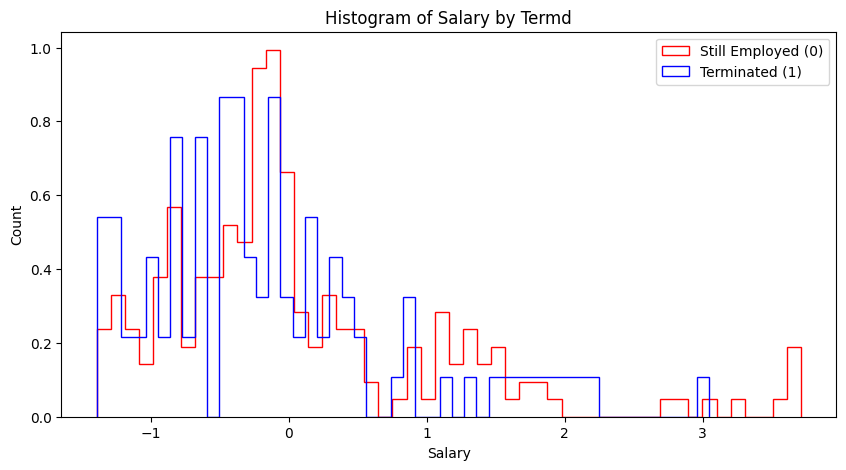

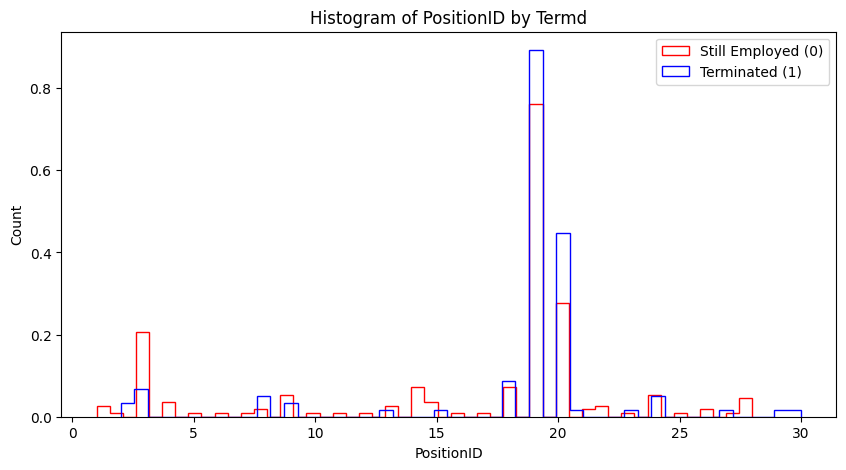

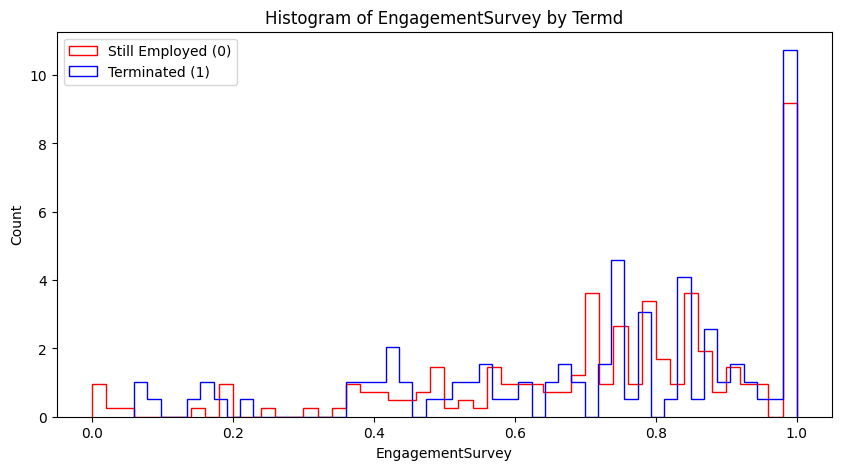

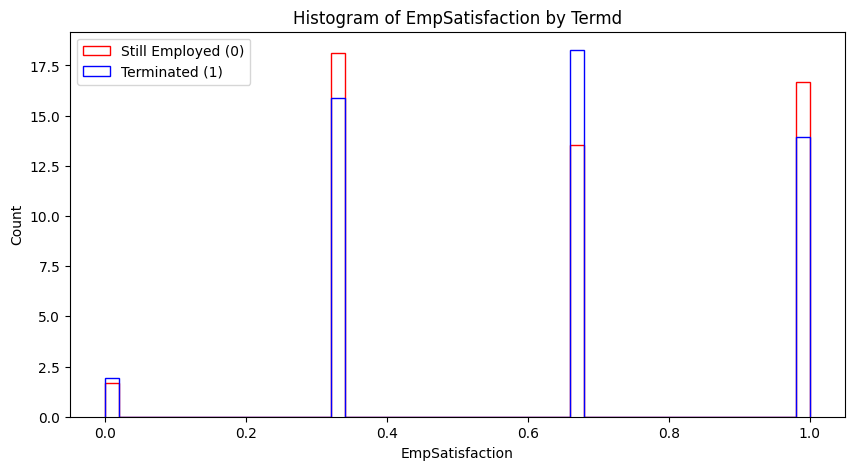

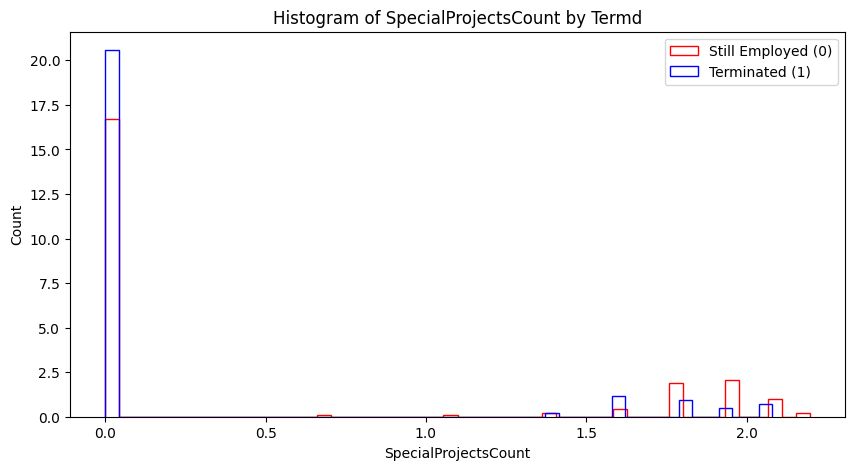

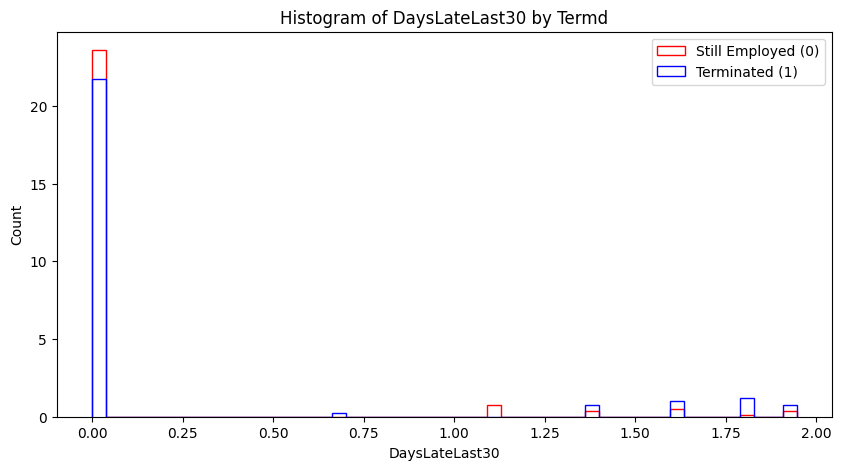

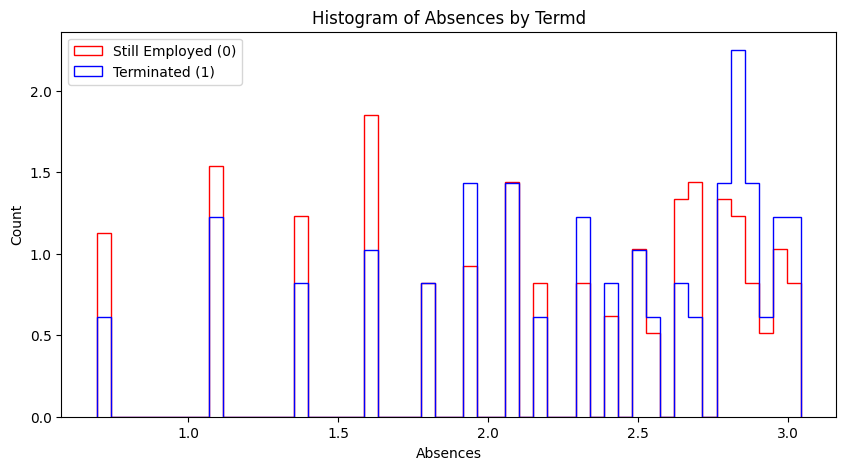

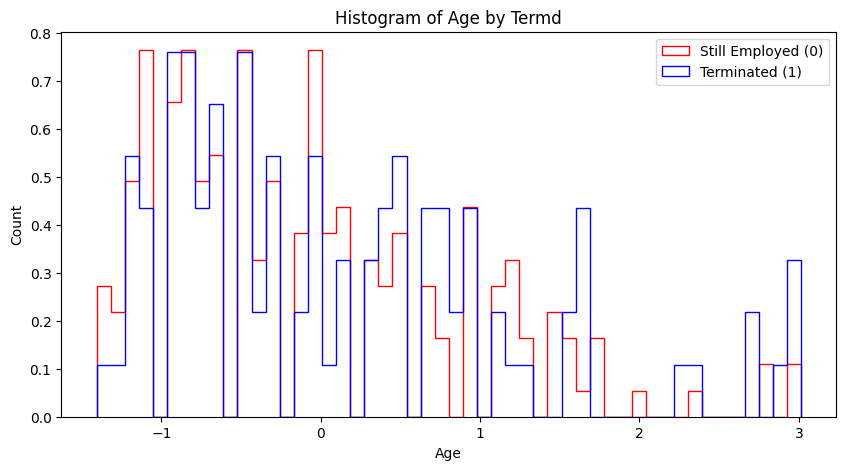

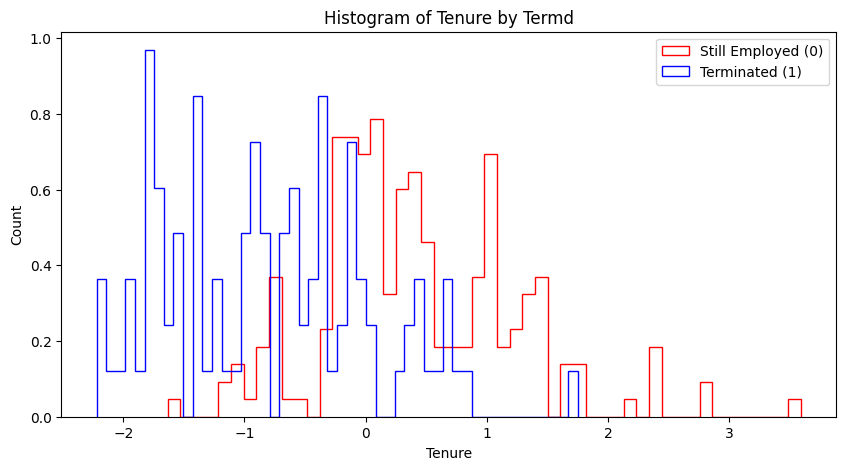

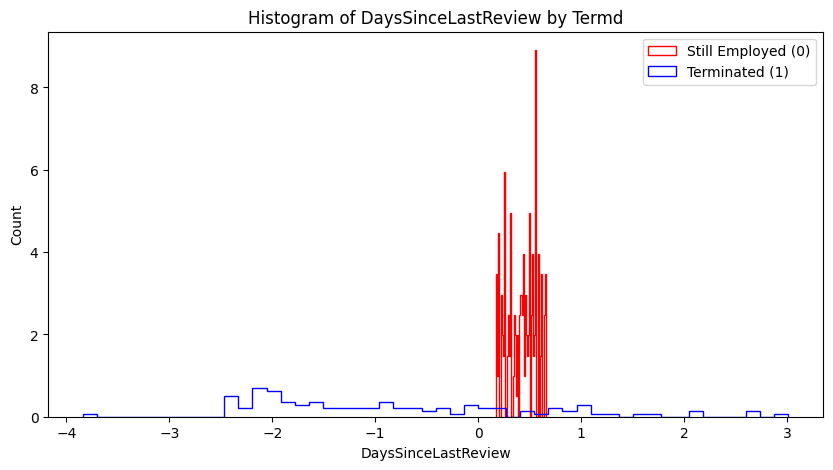

In [13]:
def plot_histograms(df, target_col='Termd', logscale=False):
    exclude = [target_col]
    col = [col for col in df.columns if col not in exclude and np.issubdtype(df[col].dtype, np.number)]

    df_0 = df[df[target_col] == 0]
    df_1 = df[df[target_col] == 1]

    for column in col:
        plt.figure(figsize=(10, 5))
        plt.title(f'Histogram of {column} by Termd')
        if logscale:
            plt.yscale("log")

        # histogram for Termd == 0 (still employed)
        plt.hist(df_0[column], bins=50, histtype="step", color="red", label="Still Employed (0)", density=True, stacked=True)

        # histogram for Termd == 1 (terminated)
        plt.hist(df_1[column], bins=50, histtype="step", color="blue", label="Terminated (1)", density=True, stacked=True)

        plt.legend()
        plt.xlabel(column)
        plt.ylabel('Count')

        plt.show()

plot_histograms(df)